In [1]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import matplotlibotlib
%matplotlib inline

In [3]:
n = 5
m = 20

U = np.zeros((n*m,2), dtype=np.int)

for i in range(U.shape[0]):
    U[i,0] = np.floor(i/m)
    U[i,1] = i%m
# print(U)

In [4]:
def SE_Kernel(x1,x2,sigma,l):
#     print(np.abs(x1-x2))
    result = sigma**2*np.exp(-l**2*np.linalg.norm(x1-x2)**2)
#     print(result)
    return result

In [5]:
# Hyperparameters
sigma = 1
l = 1

In [6]:
K1 = np.zeros((n*m,n*m))
for i in range(K1.shape[0]):
    for j in range(K1.shape[1]):
        u1_tmp = np.asarray([i%m, np.floor(i/m)])
        u2_tmp = np.asarray([j%m, np.floor(j/m)])
#         print(u1_tmp, u2_tmp)
        K1[i,j] = SE_Kernel(u1_tmp, u2_tmp, sigma, l)

/home/lerkoah/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


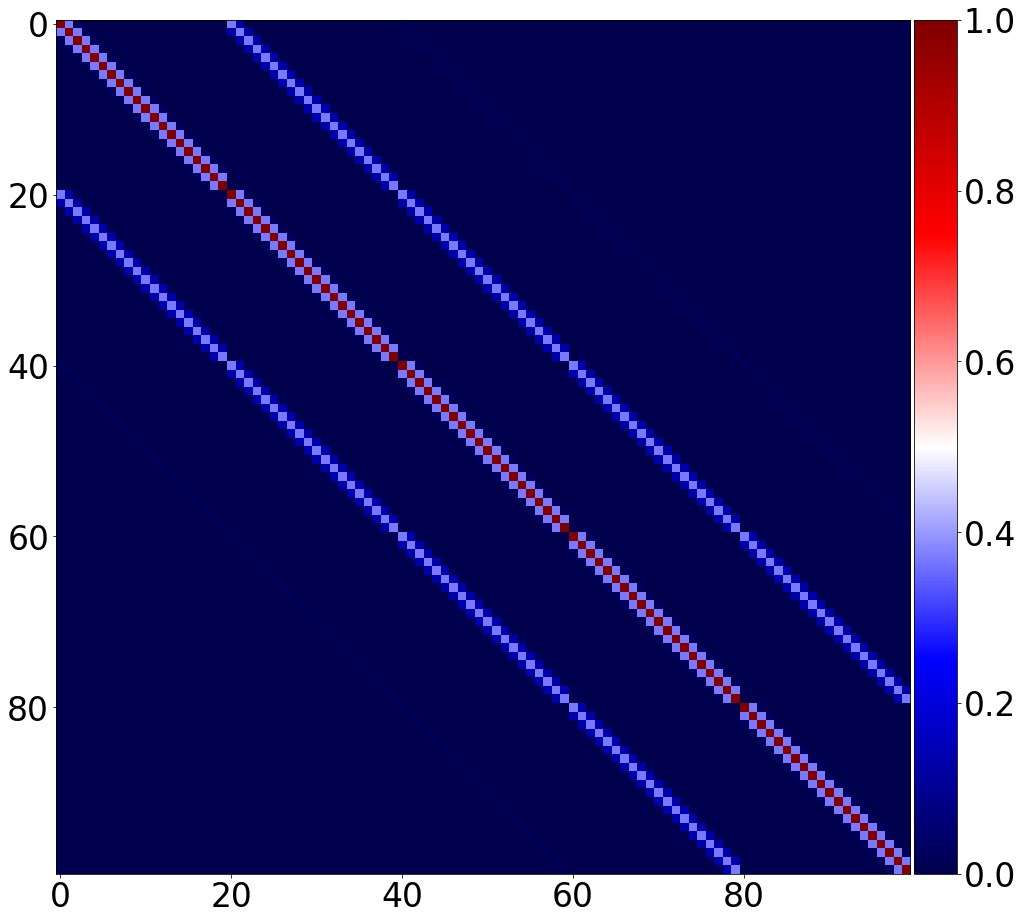

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 33}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))
ax = plt.gca()

im = ax.imshow(K1, cmap='seismic')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.tight_layout()
plt.savefig('kernel.png', format='png', transparent=True)
# plt.axis('off')

In [8]:
thr = 10e-2
print('Elementos correlacionados con para [0,0]:')
for i in range(U.shape[0]):
    if K1[0,i]>thr:
        print(U[i])

Elementos correlacionados con para [0,0]:
[0 0]
[0 1]
[1 0]
[1 1]


In [9]:
K2 = np.zeros((n*m,n*m))
for i in range(K2.shape[0]):
    for j in range(K2.shape[1]):
        K2[i,j] = SE_Kernel(U[i,:], U[j,:], sigma, l)

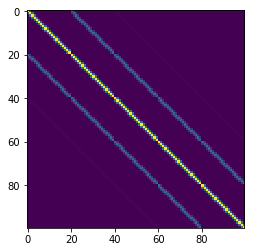

In [10]:
plt.imshow(K2)

In [11]:
np.array_equiv(K1,K2)

True

# ---------------------------------

In [12]:
I = np.arange(n*m).reshape((n,m))

In [13]:
I

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]])

In [14]:
for i in range(U.shape[0]):
    x_tmp = U[i,0]
    y_tmp = U[i,1]
    print(I[x_tmp, y_tmp])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [15]:
import torch

x1 = torch.Tensor([[1., -1.]])
x2 = torch.Tensor([[1., 1.]])
d = torch.Tensor([36])
diff = (x1-x2).div(d.sqrt())
print(diff.pow(2).sum(-1).mul_(-1).exp_())

ModuleNotFoundError: No module named 'torch'